In [89]:
import numpy as np
import scipy as sp
from scipy import linalg
import scipy.linalg as spla
from scipy.linalg import toeplitz
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from copy import deepcopy
from matplotlib import gridspec

In [8]:
#Valores propios
def NSI(A, k):
    Q = np.identity(A.shape[0])
    for i in range(k):
        Q, R = np.linalg.qr(np.dot(A, Q))
    return (np.diag(np.dot(np.dot(Q.transpose(),np.diag(A)),Q)))
# Full matrices
from scipy import linalg as LA
N = 3
Aux = np.random.rand(N,N)
A = Aux + Aux.T # symmetric, so we'll deal with real eigs.
print(LA.eigvals(A)) # Only the eigenvalues, A not necessarily symmetric
print("*"*80)
print(LA.eigvalsh(A)) # Only the eigenvalues, A symmetric 
print("*"*80)
print(LA.eig(A))     # All the eigenvalues and eigenvectors, A not necessarily symmetric
print("*"*80)
print(LA.eigh(A))    # All the eigenvalues and eigenvectors, A symmetric (faster)
print("*"*80)
lambdas, V = LA.eigh(A)    # All the eigenvalues and eigenvectors, A symmetric (faster)
l1 = lambdas[0]
v1 = V[:,0]
print(l1)
print(v1)
print(np.dot(A, v1))
print(l1*v1)

[ 4.1416703 +0.j -0.32253907+0.j  1.09568007+0.j]
********************************************************************************
[-0.32253907  1.09568007  4.1416703 ]
********************************************************************************
(array([ 4.1416703 +0.j, -0.32253907+0.j,  1.09568007+0.j]), array([[ 0.68174576,  0.73088903,  0.03199915],
       [ 0.36913112, -0.30588947, -0.87759549],
       [ 0.63163672, -0.61010888,  0.47833274]]))
********************************************************************************
(array([-0.32253907,  1.09568007,  4.1416703 ]), array([[ 0.73088903,  0.03199915, -0.68174576],
       [-0.30588947, -0.87759549, -0.36913112],
       [-0.61010888,  0.47833274, -0.63163672]]))
********************************************************************************
-0.32253906576823077
[ 0.73088903 -0.30588947 -0.61010888]
[-0.23574027  0.09866131  0.19678395]
[-0.23574027  0.09866131  0.19678395]


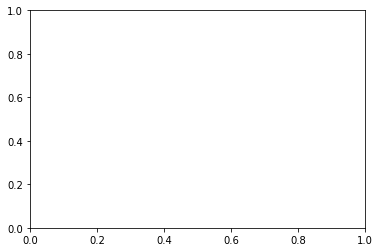

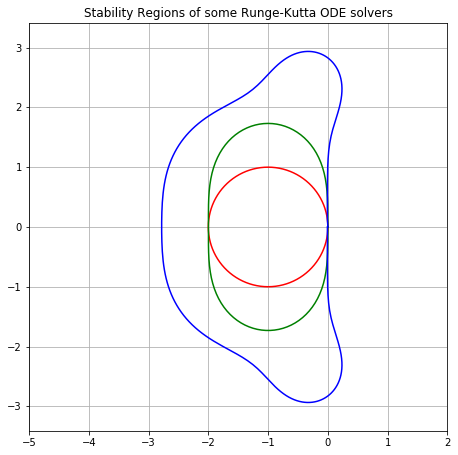

In [100]:
def zplot2(z, ax=plt.gca(), lw=1.5, line_color='k'):
    ax.plot(np.real(z), np.imag(z), line_color, lw=lw)
def runge_kutta_stability_regions():
    z = np.exp(1j * np.pi * np.arange(201)/100.)
    r = z-1
    d = 1-1./z;
    # Order 1
    W1, W2, W3, W4 = [0], [0], [0], [0]
    for zi in z[1:]:
        W1.append( W1[-1]-(1.+W1[-1]-zi) )
    for zi in z[1:]:
        W2.append( W2[-1]-(1+W2[-1]+.5*W2[-1]**2-zi**2)/(1+W2[-1]) )
    for zi in z[1:]:
        num = (1+W4[-1]+.5*W4[-1]**2+W4[-1]**3/6+W4[-1]**4/24-zi**4)
        den = (1+W4[-1]+W4[-1]**2/2+W4[-1]**3/6.)
        W4.append( W4[-1] - num/den )
    return W1, W2, W4
L = 15
W1,W2,W4=runge_kutta_stability_regions()
fig = plt.figure(figsize=(L/2,L/2))
ax=fig.gca()
zplot2(W1,ax,line_color='r')
zplot2(W2,ax,line_color='g')
zplot2(W4,ax,line_color='b')
ax.axis("equal")
ax.axis([-5, 2, -3.5, 3.5])
ax.grid("on")
ax.set_title("Stability Regions of some Runge-Kutta ODE solvers")

def euler_ode(y,t,f,h):
    return y+h*f(t,y)
def RK2_ode(y,t,f,h):
    k1=y+h/2.0*f(t,y) #or euler_ode(y,t,f,h)
    return y+h*f(t+h/2.0,k1)
    # k1=h*f(t,y)
    # return y+h*f(t+h/2.0,y+k1/2.0)

# Runge-Kutta 
def RK4_ode(y,t,f,h):
    k1=f(t,y)
    k2=f(t+h/2.0,y+(h/2.0)*k1)
    k3=f(t+h/2.0,y+(h/2.0)*k2)
    k4=f(t+h,y+h*k3)
    return y+(h/6.0)*(k1+2.0*k2+2.0*k3+k4)

def euler_ode_dinamico(r,f,h):
    #print("aca w",w)
    w1=r[:]
    w=r[:]
    w[0] = w1[0]+h*w1[1]
    w[1] = w1[1]+h*f(w1)
    #print("aca w nuevo",w)
    return w

def bisect(f, a, b, tol=1e-8):
    verbose = False
    fa = f(a)
    fb = f(b)
    i = 0
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None
  
    #Printing the evolution of the computation of the root
    if verbose: print(' i |     a     |     c     |     b     |     fa    |     fc     |     fb     |   b-a')
    if verbose: print('----------------------------------------------------------------------------------------')
    
    while(b-a)/2 > tol:
        c = (a+b)/2.
        fc = f(c)
        if verbose: print('%2d | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f' %
              (i+1, a, c, b, fa, fc, fb, b-a))
        # Did we find the root?
        if fc == 0:
            if verbose: print('f(c)==0')
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
        
    xc = (a+b)/2.
    return xc


3.23
<img src="3.23.png" style="float:right;height:100%">

In [99]:

L = 15
def F3D(t,y0):
    sol=np.zeros(3)
    sol[0]=((-y0[0]*y0[1])/20)+(y0[1]**2)*np.sin(y0[2])
    sol[1]=((y0[0]**2)/20)-(y0[0]*y0[1]*np.sin(y0[2]))
    sol[2]=t
    return sol
def F2D(t,y0):
    y1 = y0[0]
    y2 = y0[1]
    return np.array([((-y1*y2)/20)+(y2**2)*np.sin(t), ((y1**2)/20)-(y1*y2*np.sin(t))])

def JacobianF2D(t,y0):
    y1 = y0[0]
    y2 = y0[1]
    J=[[((-y2)/20),((-y1)/20)+(y2*2)*np.sin(t)],[((y1*2)/20)-(y2*np.sin(t)),-(y1*np.sin(t))]]
    lambs,vs= LA.eig(J)
    return lambs


def solucionartresveintitres(N, T):
    y0=[np.cos(np.pi/4),np.sin(np.pi/4)]
    h = T/N
    print(h)
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([2,t_times.size])
    y_output[:,0] = y0
    for i in range(1,t_times.size):
        y_output[:,i]=euler_ode(y_output[:,i-1],t_times[i-1],F2D,h)
        c1='b'
        c2='k'
        c3='k'
    fig = plt.figure(figsize=(L,L))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    ax1.grid(True)
    ax1.set_title('Numerical Approximation')
    ax1.plot(t_times,y_output[0,:],'b-')
    ax1.plot(t_times,y_output[1,:],'r-')
    ax1.axis([0, T, -1, 1])
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2])
    
    zplot2(W1,ax2,line_color=c1)
    zplot2(W2,ax2,line_color=c2)
    zplot2(W4,ax2,line_color=c3)
    for i in range(1,t_times.size):
        k_lambdah=h*JacobianF2D(t_times[i],y_output[:,i])
        ax2.plot(np.real(k_lambdah[0]),np.imag(k_lambdah[0]),'.r',ms=10,alpha=.4)
        ax2.plot(np.real(k_lambdah[1]),np.imag(k_lambdah[1]),'sm',ms=10,alpha=.4)
    ax2.axis('equal')
    ax2.axis([-5, 2, -3.5, 3.5])
    ax2.grid('on')
    
    ax3.grid(True)
    ax3.set_title("Phase Portrait")
    ax3.plot(y_output[0,:],y_output[1,:],'-')
    ax3.set(xlabel='$y=y_1$', ylabel='$\dot{y}=y_2$')
    
    ax4 = plt.subplot(gs[1])
    circle1 = plt.Circle((0, 0), 1, color='y')
    ax4.add_artist(circle1)
    #Second Subplot
    ax4.plot(y_output[0,:],y_output[1,:],'b-')
    ax4.axis([-2, 2, -2, 2])
    ax4.set_xlabel(r"$y_1$",fontsize=20)
    ax4.set_ylabel(r'$y_2$',fontsize=20)
    

    

interact(solucionartresveintitres,N=(0,1000,10),T=(0,np.pi*4,np.pi/4))

interactive(children=(IntSlider(value=500, description='N', max=1000, step=10), FloatSlider(value=6.2831853071…

<function __main__.solucionartresveintitres(N, T)>

In [6]:
def solucionartresveintitres2(N, T):
    y0=[np.cos(np.pi/4), np.sin(np.pi/4),0]
    h = N/T
    print(h)
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([3,t_times.size])
    y_output[:,0] = y0
    for i in range(1,t_times.size):
        y_output[:,i]=euler_ode(y_output[:,i-1],t_times[i-1],F3D,h)
        c1='b'
        c2='k'
        c3='k'
    #print(y_output)
    fig = plt.figure(figsize=(L,L))
    ax1 = fig.add_subplot(221)
    
    ax3 = fig.add_subplot(223)
    
    ax1.grid(True)
    ax1.set_title('Numerical Approximation')
    ax1.plot(t_times,y_output[0,:],'b-')
    ax1.plot(t_times,y_output[1,:],'r-')
    ax1.axis([0, T, -300, 300])
    ax3.grid(True)
    ax3.set_title("Phase Portrait")
    ax3.plot(y_output[0,:],y_output[1,:],'-')
    ax3.set(xlabel='$y=y_1$', ylabel='$\dot{y}=y_2$')
    
interact(solucionartresveintitres2,N=(0,100,1),T=(0,1000,10))

interactive(children=(IntSlider(value=50, description='N'), IntSlider(value=500, description='T', max=1000, st…

<function __main__.solucionartresveintitres2(N, T)>

In [10]:
def solucionartresveintitres3(N, T, omega):
    y0=[np.cos(omega), np.sin(omega)]
    h = T/N
    print(h)
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([2,t_times.size])
    y_output[:,0] = y0
    for i in range(1,t_times.size):
        y_output[:,i]=euler_ode(y_output[:,i-1],t_times[i-1],F2D,h)
        c1='b'
        c2='k'
        c3='k'
    #print(y_output)
    fig = plt.figure(figsize=(L,L))
    ax1 = fig.add_subplot(221)
    
    ax3 = fig.add_subplot(223)
    
    ax1.grid(True)
    ax1.set_title('Numerical Approximation')
    ax1.plot(t_times,y_output[0,:],'b-')
    ax1.plot(t_times,y_output[1,:],'r-')
    ax1.axis([0, T, -300, 300])
    ax3.grid(True)
    ax3.set_title("Phase Portrait")
    ax3.plot(y_output[0,:],y_output[1,:],'-')
    ax3.set(xlabel='$y=y_1$', ylabel='$\dot{y}=y_2$')
    
interact(solucionartresveintitres3,N=(0,1000,10),T=(0,100,10),omega=(0,360,1))

interactive(children=(IntSlider(value=50, description='N'), IntSlider(value=500, description='T', max=1000, st…

<function __main__.solucionartresveintitres3(N, T, omega)>

In [91]:
#Funcion que se evaluara en esta prefunta
def F1(t,y):
    y1 = y[0]
    y2 = y[1]
    return np.array([(-y1*y2)/20 + (y2**2)*np.sin(t), (y1**2)/20 - y1*y2*np.sin(t)])

def Euler_Method(y,t,f,h):
    return y+h*f(t,y)

def Trapecio_Method(y,t,f,h):
    k1=y+h/2.0*f(t,y) #or euler_ode(y,t,f,h)
    return y+h*f(t+h/2.0,k1)

def RK4_Method(y,t,f,h):
    k1=f(t,y)
    k2=f(t+h/2.0,y+(h/2.0)*k1)
    k3=f(t+h/2.0,y+(h/2.0)*k2)
    k4=f(t+h,y+h*k3)
    return y+(h/6.0)*(k1+2.0*k2+2.0*k3+k4)

def plot_y_t_2D(h,time, i=1):
    T=h*i
    print(h)
    y0 = np.array([np.cos((4/5)*np.pi),np.sin((4/5)*np.pi)])
    y_output = np.zeros([2,t_times.size])
    y_output[:,0] = y0
    
    for j in range(1,t_times.size):
        #Euler method
        y_output[:,j]=Euler_Method(y_output[:,j-1],t_times[j-1],F1,h)
        # eje x esta dado por y_1, eje y esta dado por y_2
        punto = (y_output[1,j]-y_output[1,j-1])/(y_output[0,j]-y_output[0,j-1])
        puntos.append(punto)
    
    
    fig = plt.figure(figsize=(17,6))
    
    
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2])
    #First Subplot
    ax0 = plt.subplot(gs[0])
    ax0.grid(True)
    plt.xlabel(r"$t$",fontsize = 20) 
    plt.plot(time[:i],y_output[0,:i],'b-',label=r"$y_1(t)$")
    plt.plot(time[:i],y_output[1,:i],'r-',label=r"$y_2(t)$")
    plt.legend(loc='best', borderaxespad=0., fontsize = 20)
    ax0.axis([0, np.pi, -2, 2])
    
    ax1 = plt.subplot(gs[1])
    circle1 = plt.Circle((0, 0), 1, color='y')
    ax1.add_artist(circle1)
    #Second Subplot
    ax1.plot(y_output[0,:i],y_output[1,:i],'b-')
    ax1.axis([-2, 2, -2, 2])
    ax1.set_xlabel(r"$y_1$",fontsize=20)
    ax1.set_ylabel(r'$y_2$',fontsize=20)
    plt.grid()
    plt.show()

In [93]:
# Number of discretization points
N=1000
# Maximun time used
T=np.pi
#Initial Solution
y0 = np.array([np.cos((4/5)*np.pi),np.sin((4/5)*np.pi)])

h=T/N
print(h)
t_times = np.arange(0, T+h, h)
y_output = np.zeros([2,t_times.size])
y_output[:,0] = y0
puntos = []

widgets.interact(plot_y_t_2D,i=(1,N+1), time=widgets.fixed(t_times),h=widgets.fixed(1) )

0.0031415926535897933


interactive(children=(IntSlider(value=1, description='i', max=1001, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plot_y_t_2D(h, time, i=1)>

3.28
<img src="3.28.png" style="float:right;height:100%">

In [57]:
def Fjacobian(t,y,m=1,c=2,k=50):
    J=[[0,1],[-k/m,-c/m]]
    lambs,vs= LA.eig(J)
    return lambs

def F(t,y0,m=1,c=2,k=50):
    y1 = y0[0]
    y2 = y0[1]
    return np.array([y2, (((-c*y2)-(k*y1))/m)])

def solucionarTarea(N, T,y,v):
    y0=[y,v]
    #y0=[400, 100]
    #h = T/N
    h=0.03
    print(h)
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([2,t_times.size])
    y_output[:,0] = y0
    for i in range(1,t_times.size):
        y_output[:,i]=RK2_ode(y_output[:,i-1],t_times[i-1],F,h)
        c1='b'
        c2='k'
        c3='k'
    #print(y_output)
    fig = plt.figure(figsize=(L,L))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    

    ax1.grid(True)
    ax1.set_title('Numerical Approximation')
    ax1.plot(t_times,y_output[0,:],'b-')
    ax1.plot(t_times,y_output[1,:],'r-')
    ax1.axis([0, T, -300, 300])
    
    zplot2(W1,ax2,line_color=c1)
    zplot2(W2,ax2,line_color=c2)
    zplot2(W4,ax2,line_color=c3)
    for i in range(1,t_times.size):
        k_lambdah=h*Fjacobian(t_times[i],y_output[:,i])
        ax2.plot(np.real(k_lambdah[0]),np.imag(k_lambdah[0]),'.r',ms=10,alpha=.4)
        ax2.plot(np.real(k_lambdah[1]),np.imag(k_lambdah[1]),'sm',ms=10,alpha=.4)
    ax2.axis('equal')
    ax2.axis([-5, 2, -3.5, 3.5])
    ax2.grid('on')
    
    ax3.grid(True)
    ax3.set_title("Phase Portrait")
    ax3.plot(y_output[0,:],y_output[1,:],'-')
    ax3.set(xlabel='$y=y_1$', ylabel='$\dot{y}=y_2$')
    
    ax4.grid(True)
    ax4.set_title("Phase Portrait")
    ax4.plot(y_output[0,:] ,'-bo', label='Posicion')
    ax4.plot(y_output[1,:] ,'-ro', label='Velocidad')
    ax4.axis([0, 300, -300, 300])
    ax4.set(xlabel='$y=y_1$', ylabel='$\dot{y}=y_2$')
    print(y_output)

m=1
c=2
k=50

interact(solucionarTarea,N=(0,2000,10),T=(0,100,10),y=(-50,0,0.1),v=(0,50,0.1))

interactive(children=(IntSlider(value=1000, description='N', max=2000, step=10), IntSlider(value=50, descripti…

<function __main__.solucionarTarea(N, T, y, v)>

0.03
[[-2.50000000e+01  2.50000000e+01]
 [-2.42500000e+01  5.98750000e+01]
 [-2.24537500e+01  8.99631250e+01]
 ...
 [ 9.09807209e-22 -5.45303837e-21]
 [ 7.46216058e-22 -6.24518016e-21]
 [ 5.58860654e-22 -6.70876033e-21]]


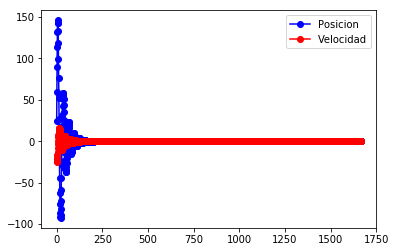

In [54]:
#Sistema Dinamico
#Lo primero que hacemos es definir la funcion que usaremos, en este caso el Sistema dinamico 
def funcion(w):
    m=1
    c=2
    k=50
    fuerza = -(w[1]*c + k*w[0])/m
    return fuerza
#La funcion la usaremnos para luego evaluar Euler
#Creamos el algoritmo para resolver
def solver_edo(y0,v0,N,T):
    #h=T/N
    h=0.03
    y=y0
    v=v0
    t_times = np.arange(0, T+h, h)
    #t = np.zeros((N,2))#2 es la cantidad de w que se tiene y N es la cantidad de puntos a iterar
    #t[1,0]=y
    #t[1,1]=v
    print(h)
    t = np.zeros([t_times.size,2])
    t[0,]=[y,v]
    for j in range(1,t_times.size):
        #print("-----iteracion j",j)
        #print("valor t",t)
        r= deepcopy(t[j-1])
        t[j,] = euler_ode_dinamico(r,funcion,h) 
        #print("valor segundo t",t)
   
    return t
p = solver_edo(-25,25,1000,50)
print(p)
plt.plot(p[:,1] ,'-bo', label='Posicion')
plt.plot(p[:,0] ,'-ro', label='Velocidad')
plt.legend(loc='upper right')

4.18
<img src="4.18.png" style="float:right;height:100%">

In [ ]:
def cuatrodiesiocho(x,f,g,l,r,c2,dx,dt,N,M):
    
    sigma1 = c2 * dt**2 / dx**2
    sigma2 = dt**2 / dx
    print('sigma**2= ',sigma1)
    print('sigma2**2= ',sigma2)
        
    # The approximation for all time-steps
    w  = np.zeros((M+1,N))
    #print(w)
    # Initial condition
    w[0,:]=f
    #print(w[0,:])    
    # Building A
    d=np.zeros(N-2)
    d[0]=2-2*sigma1-2*sigma2+dt**2
    d[1]=sigma1
    c=np.zeros(N-2)
    #c[0]=2-2*sigma1-2*sigma2+dt**2
    c[1]=sigma1+2*sigma2
    A=spla.toeplitz(d,c)
    #print(A)
    ## First step
    tmp=np.zeros(N-2)
    tmp[0]=w[0,0]
    tmp[-1]=w[0,-1]
    w[1,1:-1]=0.5*(np.dot(A,w[0,1:-1]))+dt*g[1:-1]+0.5*sigma2*tmp
    print(w[0,1:-1])
    ## All the rest of the steps
    for t in range(2,M+1):
        tmp[0]=l(dt*t)
        tmp[-1]=r(dt*t)
        w[t,1:-1]=np.dot(A,w[t-1,1:-1])-w[t-2,1:-1]+sigma2*tmp
        w[t,0]=l(dt*t)
        w[t,-1]=r(dt*t)
    return w

def l(t):
    return np.exp(-t)*np.cos(t)

def r(t):
    return np.exp(-t)*np.cos(np.pi-t)
def plot(us,i=0):
    plt.plot(x,us[i])
    plt.ylim(-1000000,1000000)
    plt.title('Tiempo: '+str(i*dt))
    plt.grid()
    plt.show()
N=100
M=200
TMAX = 40
x = np.linspace(0,np.pi,N)
t = np.linspace(0,TMAX,M)

c = 1

dx = x[1]-x[0]
dt = t[1]-t[0]
f1 = np.cos(x)
#f2 = 0.1*np.sin(2*x*np.pi/8)

# u_t(x,0)=f(x)
# SOLITON
g1 = np.sin(x)-np.cos(x)
# ONDA QUE SE DIVIDE
g2 = np.zeros(N)
us1 = cuatrodiesiocho(x,f1,g1,l,r,c**2,dx,dt,N,M)

In [ ]:
dp = 1
widgets.interact(plot,us=widgets.fixed(us1),i=(0,M,dp))

In [ ]:
def cuatrodiesiocho(x,f,g,l,r,c2,dx,dt,N,M):
    
    sigma1 = c2 * dt**2 / dx**2
    sigma2 = dt**2 / dx
    print('sigma**2= ',sigma1)
    print('sigma2**2= ',sigma2)
        
    # The approximation for all time-steps
    w  = np.zeros((M+1,N))
    # Initial condition
    w[0,:]=f 
    # Building A
    fila=np.zeros(N-2)
    fila[0]=2+dt**2-2*sigma1
    fila[1]=sigma1+sigma2 #wi+1
    
    col=np.zeros(N-2)
    col[0]=2+dt**2-2*sigma1
    col[1]=sigma1-sigma2 #wi-1
    
    A=spla.toeplitz(col,fila)
    #print(A)
    ## First step
    tmp=np.zeros(N-2)
    tmp[0]=w[0,0]
    tmp[-1]=w[0,-1]
    w[1,1:-1]=0.5*(np.dot(A,w[0,1:-1]))+dt*g[1:-1]+0.5*sigma2*tmp
    print(w[0,1:-1])
    ## All the rest of the steps
    for t in range(2,M+1):
        tmp[0]=l(dt*t)
        tmp[-1]=r(dt*t)
        w[t,1:-1]=np.dot(A,w[t-1,1:-1])-w[t-2,1:-1]+sigma2*tmp
        w[t,0]=l(dt*t)
        w[t,-1]=r(dt*t)
    return w

def l(t):
    return np.exp(-t)*np.cos(t)

def r(t):
    return np.exp(-t)*np.cos(np.pi-t)
def plot(us,i=0):
    plt.plot(x,us[i])
    plt.ylim(-100,100)
    plt.title('Tiempo: '+str(i*dt))
    plt.grid()
    plt.show()
N=100
M=200
TMAX = 40
x = np.linspace(0,np.pi,N)
t = np.linspace(0,TMAX,M)

c = 1

dx = x[1]-x[0]
dt = t[1]-t[0]
f1 = np.cos(x)
#f2 = 0.1*np.sin(2*x*np.pi/8)

# u_t(x,0)=f(x)
# SOLITON
g1 = np.sin(x)-np.cos(x)
# ONDA QUE SE DIVIDE
g2 = np.zeros(N)
us1 = cuatrodiesiocho(x,f1,g1,l,r,c**2,dx,dt,N,M)

In [ ]:
dp = 1
widgets.interact(plot,us=widgets.fixed(us1),i=(0,M,1))

3.1
<img src="3.1.png" style="float:right;height:100%">

0.4074074074074074
-0.14814814814814808
0.4074074074074074
-0.14814814814814808
0.4074074074074074
-0.14814814814814808
Secante =  -3.6666666666666665
-8.326672684688674e-17


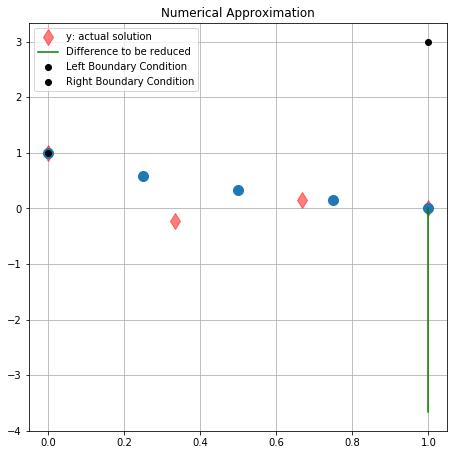

In [79]:
def solve_finite_difference_eq(I=4,y0=1,yn=3):
    # Spatial discretization, 'I' represents the number of intervals to be used.
    h=(1.-0)/I
    ## Boundarty conditions
    #y0=1.
    #y1=3.

    # Building Finite Difference Discretization
    deltas=-(2.+4.*(h**2.))
    A=toeplitz(np.append(np.array([deltas, 1.]), np.zeros(I-3)))
    # Building RHS
    b=np.append(-y0, np.zeros(I-3))
    b=np.append(b,-yn)
    # Solving the linear system of equations
    w=np.linalg.solve(A, b)
    # Adding back the boundary conditions into the solution
    w=np.append([y0], w)
    w=np.append(w,[yn])
    t_FD = np.linspace(0,1,I+1)
    w_FD = w 
    return t_FD, w_FD, A

def Fjacobian(t,y):
    J=[[0,1],[-k/m,-c/m]]
    lambs,vs= LA.eig(J)
    return lambs

def F(t,y0):
    y1 = y0[0]
    y2 = y0[1]
    return np.array([y2, -(4*y1)-(5*y2)])

def tresuno(h,T,S):
    yn=0
    y0=1
    #h = N/T
    #print(h)
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([2,t_times.size])
    y_output[:,0] = [y0,S]
    for i in range(1,t_times.size):
        y_output[:,i]=euler_ode(y_output[:,i-1],t_times[i-1],F,h)
    print(y_output[0,-1])
    return t_times,y_output

def func(alpha,yn=0):
    t_times,y_output = tresuno(1/3,1,alpha)
    return y_output[0,-1]-yn

def sec(alphaR,alphaL):
    return (func(alphaR)*alphaL-func(alphaL)*alphaR)/(func(alphaR)-func(alphaL))

#interact(tresuno,N=(0,1,0.01),T=(0,10,1),S=(-10,10,0.1),I=(3,20))
tresuno(1/3,1,0)
tresuno(1/3,1,-5)
yn=0
y0=1
alphaX = sec(0,-5)
print('Secante = ', alphaX)
t_times,y_output = tresuno(1/3,1,alphaX)

fig = plt.figure(figsize=(L/2,L/2))
ax = fig.gca()
plt.grid(True)
plt.title("Numerical Approximation")
plt.plot(t_times,y_output[0,:],'rd',ms=12,alpha=0.5,label='y: actual solution')


# Solving by Finite Difference
t_FD, w_FD, _ = solve_finite_difference_eq(4,y0,yn)
plt.plot(t_FD,w_FD,'.',ms=20,alpha=1)

# Plotting distance to be reduced, so the missing initial condition is found.
plt.plot([t_FD[-1],t_times[-1]],[w_FD[-1],y_output[-1,0]],'g-',label='Difference to be reduced')

plt.plot(0,1,'.k',ms=12,label='Left Boundary Condition')
plt.plot(1,3,'.k',ms=12,label='Right Boundary Condition')

plt.legend()


In [45]:
a=np.array([1,0])
b=np.array([0,-4])
h=1/3
c=a+h*b
print(c)

A=np.zeros((5,5))
print(A)
A[0,:]=1
print(A)
B=np.zeros((5,5))
B[0]=1
print(B)


d=np.zeros(5)
d[0]=1 #beta
d[1]=2 #jota
c=np.zeros(5)
c[0]=1 #beta
c[1]=-2 #lamda
A=spla.toeplitz(d,c)
print(A)

[ 1.         -1.33333333]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 1. -2.  0.  0.  0.]
 [ 2.  1. -2.  0.  0.]
 [ 0.  2.  1. -2.  0.]
 [ 0.  0.  2.  1. -2.]
 [ 0.  0.  0.  2.  1.]]


sepaP
<img src="sepaP.png" style="float:right;height:100%">

In [114]:
def Fjacobian(t,y,m=1,c=2,k=50):
    J=[[-3]]
    lambs,vs= LA.eig(J)
    return lambs

def F(t,y0,m=1,c=2,k=50):
    y1 = y0[0]
    return np.array([-3*y1+6*t+5])

def solucionarTarea(N, T,y):
    y0=[y]
    #y0=[400, 100]
    h = T/N
    #print(h)
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([1,t_times.size])
    y_output[:,0] = y0
    for i in range(1,t_times.size):
        y_output[:,i]=euler_ode(y_output[:,i-1],t_times[i-1],F,h)
        c1='b'
        c2='k'
        c3='k'
    #print(y_output)
    fig = plt.figure(figsize=(L,L))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)

    
    #print(y_output[0,:])
    ax1.grid(True)
    ax1.set_title('Numerical Approximation')
    ax1.plot(t_times,y_output[0,:],'b-')
    ax1.axis([0, T, -300, 300])
    
    zplot2(W1,ax2,line_color=c1)
    zplot2(W2,ax2,line_color=c2)
    zplot2(W4,ax2,line_color=c3)
    for i in range(1,t_times.size):
        k_lambdah=h*Fjacobian(t_times[i],y_output[:,i])
        ax2.plot(np.real(k_lambdah[0]),np.imag(k_lambdah[0]),'.r',ms=10,alpha=.4)
    ax2.axis('equal')
    ax2.axis([-5, 2, -3.5, 3.5])
    ax2.grid('on')
    print(y_output[0,-1])


interact(solucionarTarea,N=(0,2000,10),T=(0,100,10),y=(-10,10,1))
y_sol = lambda t: 2 * np.exp(-3*t) + 2*t + 1
print(y_sol(50))

interactive(children=(IntSlider(value=1000, description='N', max=2000, step=10), IntSlider(value=50, descripti…

101.0


h: 0.05005005005005005
y_reales:	101.0
y_aprox:	101.00000000000001


[0, 50, -1.4210854715202004e-14, 0.05890717622239583]

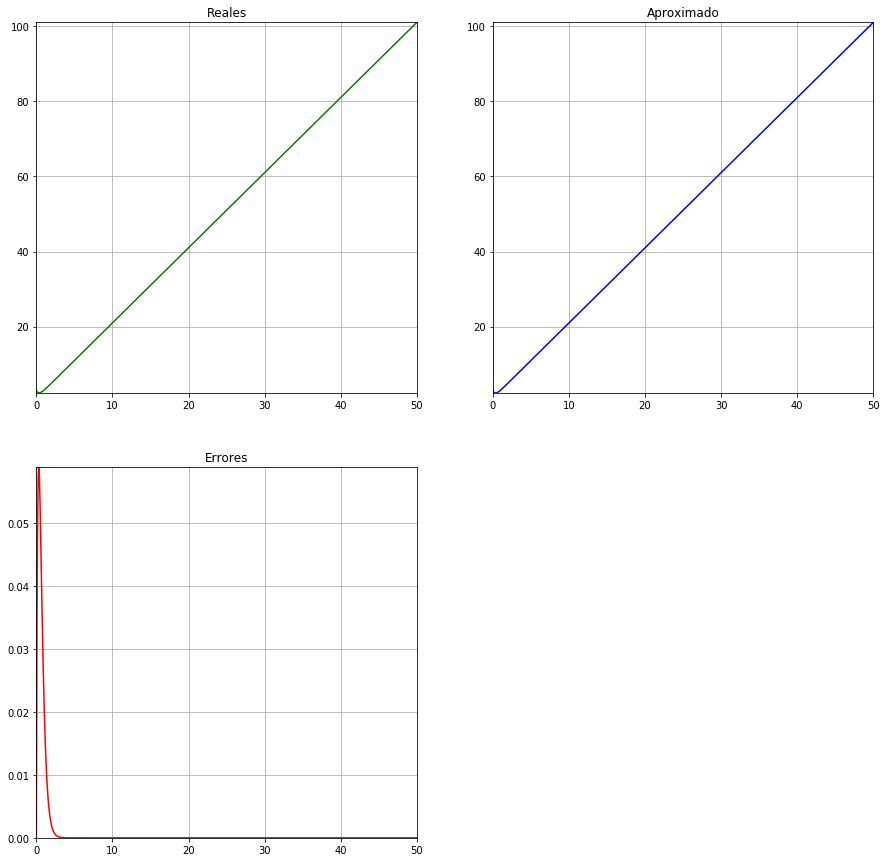

In [85]:
y_1d = lambda t, y : np.array(-3*y + 6*t + 5)
y_sol = lambda t: 2 * np.exp(-3*t) + 2*t + 1
 
def my_solver(y0, tf, N, ti = 0):
    t = np.linspace(t_inicial, t_final, N)
    h = t[1]-t[0]
    print('h: {}'.format(h))
    y_aprox = np.zeros(N)
    y_aprox[0] = y0
    #print('initial\t=> {}'.format(y_aprox))
    for i in range(1, N):
        y_aprox[i] = euler_ode(y_aprox[i-1], t[i-1], y_1d, h)
        #print('i={}\t=> {}'.format(i, y_aprox))
    return y_aprox
 
t_inicial, t_final, num_puntos = 0, 50, 1000
t = np.linspace(t_inicial, t_final, num_puntos)
y_reales = y_sol(t)
y_aprox = my_solver(y0 = 3, tf = t_final, N = num_puntos)
 
#print('\nt:\t\t{}'.format(t))
print('y_reales:\t{}'.format(y_reales[-1]))
print('y_aprox:\t{}'.format(y_aprox[-1]))
 
# Plot
min_both = min(min(y_reales), min(y_aprox))
max_both = max(max(y_reales), max(y_aprox))
 
fig = plt.figure(figsize=(L,L))
 
ax1 = fig.add_subplot(221)
ax1.grid(True)
ax1.set_title('Reales')
ax1.plot(t, y_reales, 'g-')
ax1.axis([t_inicial, t_final, min_both, max_both])
 
ax2 = fig.add_subplot(222)
ax2.grid(True)
ax2.set_title('Aproximado')
ax2.plot(t, y_aprox, 'b-')
ax2.axis([t_inicial, t_final, min_both, max_both])
 
ax3 = fig.add_subplot(223)
ax3.grid(True)
ax3.set_title('Errores')
errores = y_reales-y_aprox
ax3.plot(t, errores, 'r-')
ax3.axis([t_inicial, t_final, min(errores), max(errores)])

3.29
<img src="3.29.png" style="float:right;height:100%">

In [125]:
def Fjacobian(t,y,m=1,c=2,k=50):
    J=[[0,1],[-2,-2]]
    lambs,vs= LA.eig(J)
    return lambs

def F(t,y0):
    y1 = y0[0]
    y2 = y0[1]
    return np.array([y2, -2*y1-2*y2])



def solucionarTarea(T):
    y0=[0,1]
    h = 1
    t_times = np.arange(0, T+h, h)
    y_output = np.zeros([2,t_times.size])
    y_output[:,0] = y0
    print(y_output)
    for i in range(1,t_times.size):
        y_output[:,i]=euler_ode(y_output[:,i-1],t_times[i-1],F,h)
        print(y_output)
    
    return(y_output[0,-1])



sol=solucionarTarea(4)
myfun = lambda t : solucionarTarea(t)*np.exp(-t**2)
def midpoint(myfun, N, a, b, verbose=False, text='', figname=''):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
    dx = x[1]-x[0]
    midpoints = x[:-1] + .5*dx
    midpoint_values = f(midpoints)
    int_val = sum(midpoint_values*dx)
    if verbose:
        xbin = np.vstack([x[:-1], x[1:]]).flatten('F')
        ybin = np.vstack([midpoint_values, midpoint_values]).flatten('F')
        plot(f, xbin, ybin, int_val, N, text, figname)
    return int_val

#sol=midpoint(myfun,1000,0,10)
print(sol)

[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[ 0.  1.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.]]
[[ 0.  1.  0.  0.  0.]
 [ 1. -1. -1.  0.  0.]]
[[ 0.  1.  0. -1.  0.]
 [ 1. -1. -1.  1.  0.]]
[[ 0.  1.  0. -1.  0.]
 [ 1. -1. -1.  1.  1.]]
0.0


In [121]:
def F(t, y0):
    y1 = y0[0]
    y2 = y0[1]
    return np.array([y2, -2*y1-2*y2])
 
def solver2(y_1d, y0, tf, N, ti = 0):
    t = np.linspace(ti, tf, N)
    print('t: {}\n'.format(t))
    h = t[1]-t[0]
    print('h: {}\n'.format(h))
    y_aprox = np.zeros((N,len(y0)))
    y_aprox[0] = y0
    print('initial\n{}\n'.format(y_aprox))
    for i in range(1, N):
        y_aprox[i] = euler_ode(y_aprox[i-1], t[i-1], y_1d, h)
        print('i={}\n{}\n'.format(i, y_aprox))
    return y_aprox

y0 = [0, 1]
y_aprox = solver2(F, y0, 3, 4)
print('y_aprox:\n{}'.format(y_aprox))

t: [0. 1. 2. 3.]

h: 1.0

initial
[[0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

i=1
[[ 0.  1.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]]

i=2
[[ 0.  1.]
 [ 1. -1.]
 [ 0. -1.]
 [ 0.  0.]]

i=3
[[ 0.  1.]
 [ 1. -1.]
 [ 0. -1.]
 [-1.  1.]]

y_aprox:
[[ 0.  1.]
 [ 1. -1.]
 [ 0. -1.]
 [-1.  1.]]
